<a href="https://colab.research.google.com/github/aarjunsrinivasan/ENPM-808Y-Neural-Networks/blob/master/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##                                                  MNIST Classification

In [0]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib
from datetime import datetime

In [0]:
# Data Downloading
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

#Data Reshaping
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

#Data  Normalising
train_images, test_images = train_images / 255.0, test_images / 255.0

In [0]:
# Model Creation

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_3 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 64)       

In [0]:
model.compile(optimizer='adam',learning_rate=0.001,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

hist=model.fit(x=train_images, 
            y=train_labels, 
            epochs=5, 
            validation_data=(test_images, test_labels),callbacks=[tensorboard_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.1040 - accuracy: 0.9689 - val_loss: 0.0417 - val_accuracy: 0.9861
Epoch 2/5
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.0442 - accuracy: 0.9868 - val_loss: 0.0299 - val_accuracy: 0.9900
Epoch 3/5
60000/60000 [==============================] - 58s 974us/sample - loss: 0.0331 - accuracy: 0.9892 - val_loss: 0.0327 - val_accuracy: 0.9900
Epoch 4/5
60000/60000 [==============================] - 59s 979us/sample - loss: 0.0249 - accuracy: 0.9923 - val_loss: 0.0271 - val_accuracy: 0.9912
Epoch 5/5
60000/60000 [==============================] - 58s 963us/sample - loss: 0.0200 - accuracy: 0.9937 - val_loss: 0.0340 - val_accuracy: 0.9901


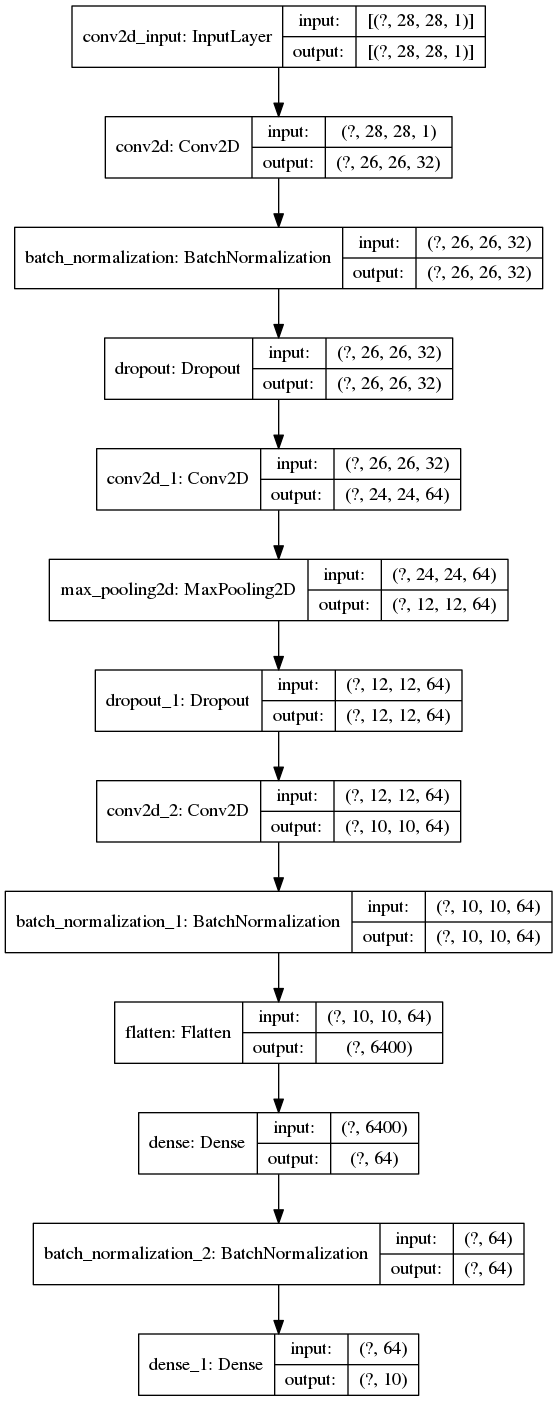

In [0]:
tf.keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)

## LOSS CURVE


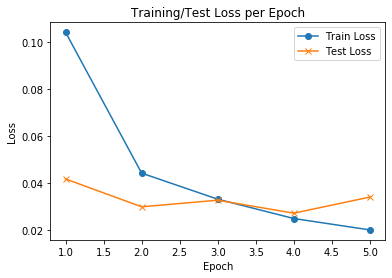

<Figure size 576x432 with 0 Axes>

In [0]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')
ax.legend(['Train Loss', 'Test Loss'], loc = 0)
ax.set_title('Training/Test Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss') 
plt.show()
figure = plt.gcf()
figure.set_size_inches(8, 6)
plt.savefig("sample.png", dpi=100)
# plt.savefig('Loss_curve.png')

## ACCURACY CURVE

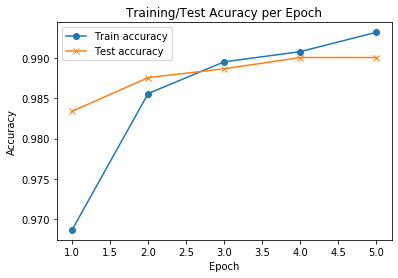

In [0]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')
ax.legend(['Train accuracy', 'Test accuracy'], loc = 0)
ax.set_title('Training/Test Acuracy per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy') 
plt.show()

In [0]:
train_score=model.evaluate(train_images,train_labels, verbose=0)
print("Train Accuracy: %.2f%%" % (train_score[1]*100))

Train Accuracy: 99.51%


In [0]:
test_score=model.evaluate(test_images,test_labels, verbose=0)
print("Test Accuracy: %.2f%%" % (test_score[1]*100))

Test Accuracy: 99.03%


In [0]:

%load_ext tensorboard

In [0]:
%tensorboard --logdir logs

## TEST DATA CONFUSION MATRIX

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3f905243d0>)

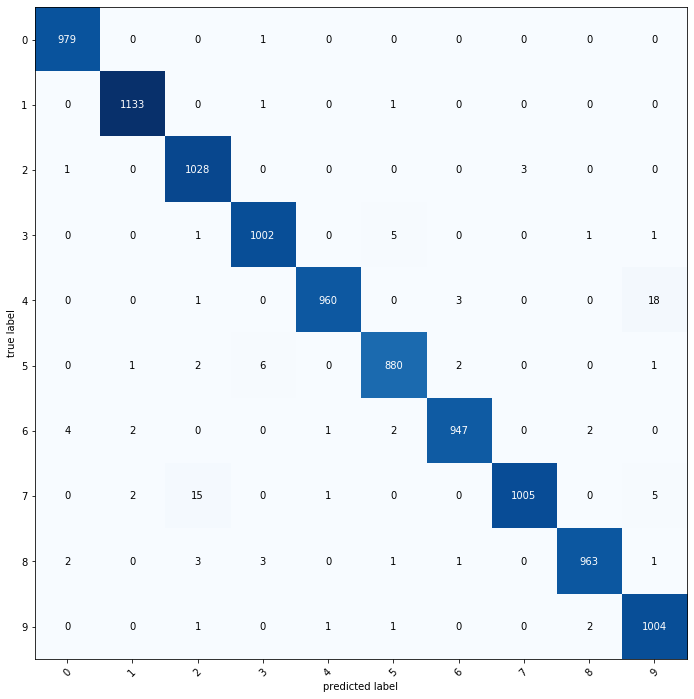

In [0]:
y_true=test_labels
y_pred=model.predict_classes(test_images)
classes=[0,1,2,3,4,5,6,7,8,9]
# matplotlib.rc('font', **font)
mat = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(12, 12), class_names = classes, show_normed=False)

## TRAIN DATA CONFUSION MATRIX

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9330433c90>)

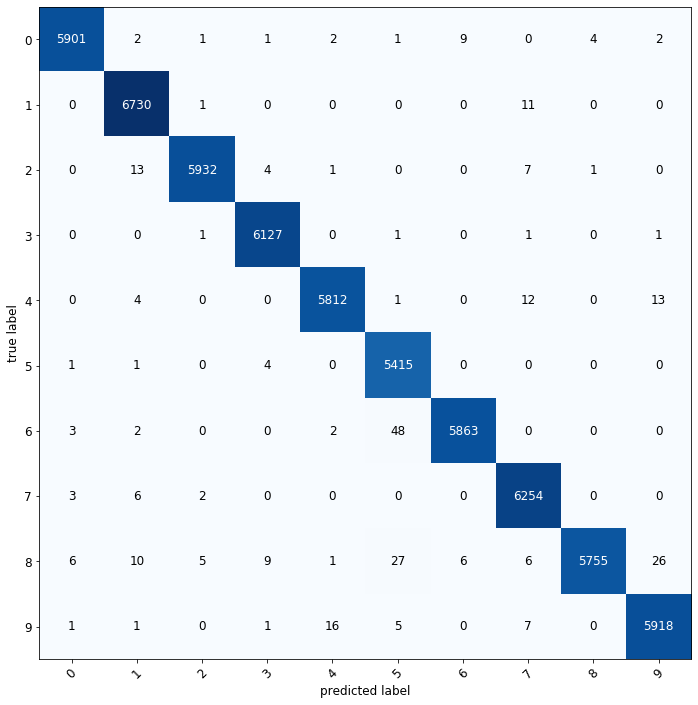

In [0]:
ytrain_true=train_labels
ytrain_pred=model.predict_classes(train_images)
matplotlib.rc('font', **font)
mat = confusion_matrix(ytrain_true, ytrain_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(12, 12), class_names = classes, show_normed=False)

In [0]:
classes=[0,1,2,3,4,5,6,7,8,9]

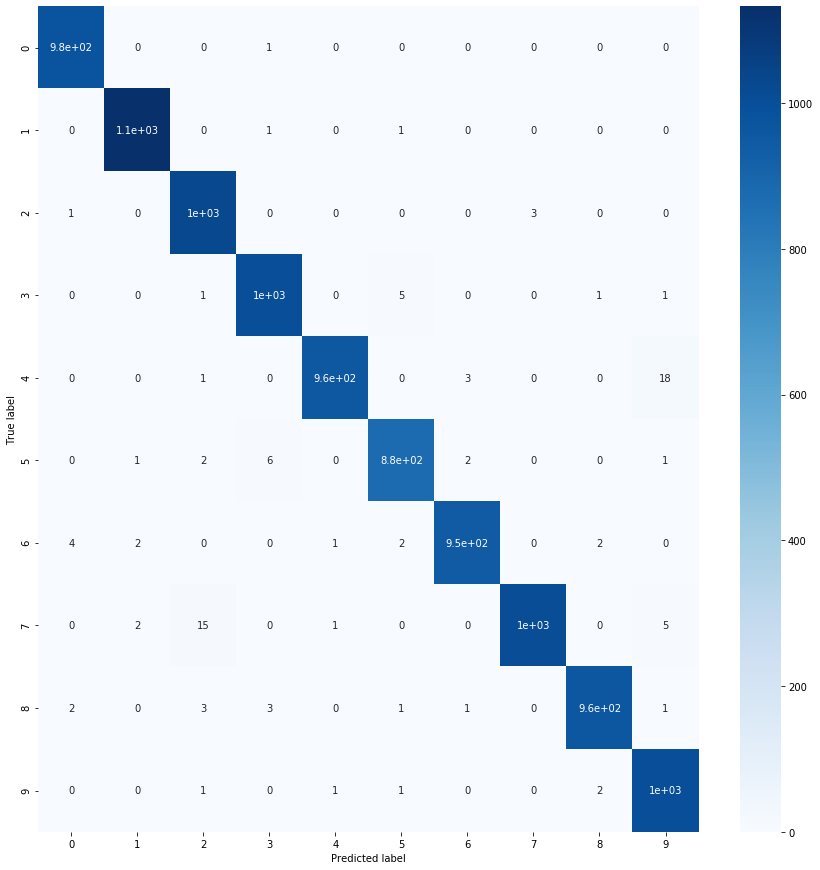

In [0]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
# con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(12, 12))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [0]:
%tensorboard --logdir logs

In [0]:
# probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
# predictions = probability_model.predict(test_images)
predictions = model.predict(test_images)
p=0
for i in range(10000):
    a=predictions[i].argsort()[-3:][::-1]
    if y_true[i] in a:
                   p=p+1
